In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("./data/train_E6oV3lV.csv", index_col=0)

In [3]:
train_data.head(5)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [4]:
train_data.shape

(31962, 2)

In [5]:
import matplotlib.pyplot as plt

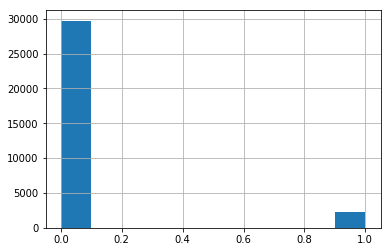

In [6]:
train_data['label'].hist()

In [7]:
import re

In [8]:
print(train_data['tweet'].iloc[0])

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [9]:
def remove_user(tweet):
    occur = re.findall('(@[a-zA-Z0-9_]*)', tweet)
    for i in occur:
        tweet = re.sub(i, '', tweet)
    return tweet

In [10]:
tweet = remove_user(train_data['tweet'].iloc[0])
print(tweet)

  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [11]:
def hashtag_extract(tweet):
    return re.findall(r"#(\w+)", tweet)

In [12]:
print(tweet)
hashtags = hashtag_extract(tweet)
print(hashtags)

  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
['run']


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
from nltk.stem.porter import *
stemmer = PorterStemmer()
import string

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def remove_stopwords(tweet):
    word_tokens = tknzr.tokenize(tweet)
    filtered_sentence = []
    all_stops = stop_words | set(string.punctuation)
    for w in word_tokens:
        if w not in all_stops:
            filtered_sentence.append(w)
    map(stemmer.stem, filtered_sentence)
    return ' '.join(filtered_sentence)

In [16]:
tweet = remove_stopwords(tweet)

In [17]:
print(tweet)

father dysfunctional selfish drags kids dysfunction #run


In [18]:
def preprocess_data(tweet):
    tweet = remove_user(tweet)
    hashtags = hashtag_extract(tweet)
    tweet = remove_stopwords(tweet)
    
    return tweet

In [19]:
train_data['new_tweet'] = train_data['tweet'].apply(preprocess_data)
train_data['new_tweet'] = train_data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
train_data['new_tweet'] = train_data['new_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
train_data.head()

,label,tweet,new_tweet
id,,,
1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
3,0,bihday your majesty,bihday majesty
4,0,#model i love u take with u all the time in ...,#model love take time
5,0,factsguide: society now #motivation,factsguide society #motivation


In [21]:
embeddings_index = dict()
f = open('./data/glove.twitter.27B.200d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1193514 word vectors.


In [22]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [23]:
t = Tokenizer()

In [24]:
docs = list(train_data.iloc[:,2])

In [25]:
docs

['father dysfunctional selfish drags kids dysfunction #run',
 'thanks #lyft credit cause offer wheelchair vans #disapointed #getthanked',
 'bihday majesty',
 '#model love take time',
 'factsguide society #motivation',
 'huge fare talking leave chaos disputes #allshowandnogo',
 'camping tomorrow danny',
 'next school year year exams think #school #exams #hate #imagine #actorslife #revolutionschool #girl',
 'love land #allin #cavs #champions #cleveland #clevelandcavaliers',
 'welcome',
 '#ireland consumer price index climbed previous #blog #silver #gold #forex',
 'selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love',
 'daddy today days #gettingfed',
 '#cnn calls #michigan middle school build wall chant #tcot',
 'comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins',
 'ouch junior angry #got #junior #yugyoem #omg',
 'thankful paner #thankful #positive',
 'retweet agree',
 '#friday smil

In [26]:
t.fit_on_texts(docs)

In [27]:
vocab_size = len(t.word_index) + 1

In [28]:
encoded_docs = t.texts_to_sequences(docs)

In [29]:
print(encoded_docs)

[[13, 13918, 2260, 5651, 132, 6950, 986], [73, 4792, 2014, 438, 1220, 6951, 9000, 13919, 9001], [10, 2827], [56, 1, 15, 5], [2415, 1088, 165], [783, 5652, 486, 217, 3385, 13920, 13921], [1733, 39, 3720], [62, 135, 66, 66, 1667, 46, 135, 1667, 111, 1089, 3386, 13922, 51], [1, 1038, 5653, 881, 3087, 1179, 13923], [508], [1012, 2261, 1090, 1591, 9002, 814, 50, 78, 71, 93], [2260, 43, 9003, 2622, 570, 13924, 2260, 1221, 2623, 1], [335, 6, 23, 13925], [2015, 1222, 6952, 1315, 135, 1524, 1368, 6953, 1592], [1129, 950, 4793, 1464, 6954, 5654, 6954], [3387, 3088, 133, 3089, 3088, 13926, 1180], [7, 1316, 7, 8], [274, 657], [22, 322, 143, 1054, 2137, 20, 9], [41, 1593, 1821, 114, 9004], [176, 9, 3721, 13927, 1415, 4794, 708, 172, 86, 1525, 1130, 9005], [84, 1091, 4795, 13928, 721, 2138, 124, 3388], [1013, 2, 637, 1181, 18, 5, 287, 688], [4181, 244, 2416, 4181], [363, 1039, 1317, 1822, 951], [24, 798, 2417, 3722, 2828, 1], [322, 291, 13929, 9006, 1734, 52, 1318, 1], [27, 3723, 13930, 927, 597, 90

In [30]:
from keras.preprocessing.sequence import pad_sequences
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 5651   132  6950   986]
 [ 6951  9000 13919  9001]
 [   10  2827     0     0]
 ...
 [ 1017   160    34    16]
 [ 1298  1081  1299  1300]
 [   75    58     0     0]]


In [31]:
embedding_matrix = np.zeros((vocab_size, 200))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
labels = train_data.iloc[:,0]
model = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 200)            7232200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 801       
Total params: 7,233,001
Trainable params: 801
Non-trainable params: 7,232,200
_________________________________________________________________
None
Accuracy: 94.696827
